# <font color ='Black'> Project Challenge: Recommender system for the Amazon food data!

by 
* Haimi Qiu (s212650)
* Malthe Andreas Lejbølle Jelstrup (s184291)
* Mathias Sofus Hovmark (s173853)
* Frederik Sandström Ommundsen (s183951)
* Jiafei Xia (s213084) </font>

# Table of Contents
- [Part 1: <u>Introduction</u>](#intro)
- [Part 2: <u>Data Analysis and Visualisation</u>](#datavis)
    - [2.1: <u>Load and Present Basic Information of the Dataset</u>](#load)
    - [2.2: <u>Insight Exploration</u>](#insight) 
    - [2.3: <u>Data Cleaning</u>](#cleaning)
    
- [Part 3: <u>Recommender System</u>](#RS)
    - [3.1: <u>Non-personalized Recommender System</u>](#Non-personalized)
    - [3.2: <u>Personalized Recommender System</u>](#Personalized) 
- [Part 4: <u>Matrix Factorization and LDA Combination</u>](#explore)
- [Part 5: <u>Survival Analysis</u>](#survival)
- [Part 6: <u>Conclusion</u>](#conc)

---
<a id='intro'></a>

# Part 1: Introduction

In this project we will be working with Amazon review data for "groceries" and "gourmet food". The dataset was obtained through https://nijianmo.github.io/amazon/index.html and spans a period of 18 years from 2000-2018. The main objective of the project is to build a recommender system for recommending products to users. First, a brief overview of the data will be given and the preliminary cleaning steps will be presented. Then, the specific research questions that will be explored in the report will be presented.

The dataset contains approximately 5.175.105 reviews of product from the 'groceries' and 'gourmet food' sections on Amazon. 
**Due to the computational cost, with different recommendation algorithms, we selected diffeent subset data to demenstrate the ideas of recommender system.** Tables 1 and 2 (in the following section of Part 2: Data Analysis and Visualisation) show descriptive statistics including missing values for the datasets features. The features included in the dataset are as follows:

**Features**
* **reviewerID** - ID of the reviewer, e.g. A2SUAM1J3GNN3B
* **asin** - ID of the product, e.g. 0000013714
* **reviewerName** - name of the reviewer
* **vote** - number of people who have indicated that the given review was 'helpful'
* **reviewText** - the full review text
* **overall** - the rating of the product (from 1-5, discrete values)
* **summary** - a summary of the review as provided by the user who wrote the review (i.e. a review 'title')
* **reviewTime** - time and date of the review
* **image** - images that users post after they have received the product
* **verified** - a feature indicating whether the review comes from an Amazon account that has previously purchased this product
* **price** - the price of the product the review concerns
* **main_cat** - the main overall category each product has been assigned to by Amazon
* **bottom_cat** - the most specific category each product has been assigned to

---
<a id='dataprep'></a>

# Part 2: Data Analysis and Visualisation

In [341]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})
from nltk.stem import WordNetLemmatizer # text mining
from sklearn.feature_extraction import _stop_words
import nltk
import string
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression # content-based CF
from surprise import SVD
from surprise.dataset import Reader, Dataset # MF
from surprise.model_selection import GridSearchCV # SVD

<a id='load'></a>

### 2.1: Load and present basic information of the dataset

**In this section, we used the full dataset for basis data exploration before creating recommendation system.**   

In [2]:
# df=pd.read_csv('merged_df.csv') # sub-set
df=pd.read_csv('merged_full.csv') # full
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
overall,5,4,4,5,4
verified,True,True,True,True,True
reviewTime,"06 4, 2013","05 23, 2014","05 9, 2014","04 20, 2014","04 16, 2014"
reviewerID,ALP49FBWT4I7V,A1KPIZOCLB9FZ8,A2W0FA06IYAYQE,A2PTZTCH2QUYBC,A2VNHGJ59N4Z90
asin,1888861614,1888861614,1888861614,1888861614,1888861614
reviewerName,Lori,BK Shopper,daninethequeen,Tammara,LaQuinta Alexander
reviewText,Very pleased with my purchase. Looks exactly l...,Very nicely crafted but too small. Am going to...,still very pretty and well made...i am super p...,"I got this for our wedding cake, and it was ev...",It was just what I want to put at the top of m...
summary,Love it,Nice but small,"the ""s"" looks like a 5, kina",Would recommend this to a friend!,Topper
unixReviewTime,1370304000,1400803200,1399593600,1397952000,1397606400


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5175105 entries, 0 to 5175104
Data columns (total 17 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   Unnamed: 0      int64 
 1   overall         int64 
 2   verified        bool  
 3   reviewTime      object
 4   reviewerID      object
 5   asin            object
 6   reviewerName    object
 7   reviewText      object
 8   summary         object
 9   unixReviewTime  int64 
 10  vote            object
 11  image           object
 12  style           object
 13  price           object
 14  main_cat        object
 15  category        object
 16  bottom_cat      object
dtypes: bool(1), int64(3), object(13)
memory usage: 636.7+ MB


In [4]:
print("================================================")
print("No. of missing value for each parameter")
print("================================================")
df.isnull().sum()

No. of missing value for each parameter


Unnamed: 0              0
overall                 0
verified                0
reviewTime              0
reviewerID              0
asin                    0
reviewerName          662
reviewText           2917
summary              1376
unixReviewTime          0
vote              4499677
image             5103186
style             2844718
price             1543805
main_cat             8290
category                0
bottom_cat              0
dtype: int64

**The dataset has 5.175.105 observations and 17 features columns. 3 is of type int64s and 14 are objects. From the `df.isnull().sum()` column we can see quite a few feature columns contain missing values.**

In [5]:
#Splitting the datestamp into day/year/month and seasons
df['Date'] = pd.to_datetime(df.reviewTime.values)
df['year'] = df.Date.apply(lambda x: x.year)
df['day'] = df.Date.apply(lambda x: x.weekday())
df['month'] = df.Date.apply(lambda x: x.month)
bins = ["Winter", "Spring", "Summer", "Fall"]
df['season'] = df.month%12 //3
df['season'] = df['season'].apply(lambda x : bins[x])
df['vote'] = df['vote'].str.replace(',', '').replace(np.nan, 0).astype(int)
df['price'].str.replace('$', '').replace(',', '').replace(np.nan, 0)
# dropping the columns which has no impact regarding the research questions
df=df.drop(columns=['Unnamed: 0', 'unixReviewTime', 'reviewTime','image', 'reviewerName','style','category'])

In [6]:
unique=np.array([])
maxunique=np.array([])
minunique=np.array([])
meancounts=np.array([])
stdcounts=np.array([])
missingcounts=np.array([])
mainds=df.copy()
categorical = ['reviewerID', 'asin', 'reviewText', 'verified', 'summary', 'year', 'bottom_cat', 'main_cat']

for i in categorical:
    unique=np.append(unique, len(mainds[i].unique()))
    maxunique=np.append(maxunique, {mainds[i].value_counts().idxmax() : mainds[i].value_counts().max()})
    minunique=np.append(minunique, {mainds[i].value_counts().idxmin() : mainds[i].value_counts().min()})
    meancounts=np.append(meancounts, mainds[i].value_counts().mean())
    stdcounts=np.append(stdcounts, mainds[i].value_counts().std())
    missingcounts=np.append(missingcounts, len(mainds[mainds[i].isnull()]))

    
test=pd.DataFrame([unique, maxunique, minunique, meancounts, stdcounts, missingcounts]).T
test.index=categorical
test.columns=['Unique values', 'Most frequent category (N)', 'Least frequent category (N)',
             'Mean frequency per category', 'SD', 'Number of missing values']
test['Unique values']=test['Unique values']-(test['Number of missing values']>0).astype(int)
test['Description']=['Reviewer identifier', 'Product ID (identical products have same ID)', 'Full review text for product',
                     '1 if reviewer has bought product, 0 otherwise','The chosen title for the user''s review','Year of review',
                    'Most specific product category','Amazon''s identified overall category']
print("* Month will be treated as nominal")
table1=test
table1

* Month will be treated as nominal


,Unique values,Most frequent category (N),Least frequent category (N),Mean frequency per category,SD,Number of missing values,Description
reviewerID,2695230.0,{'A1LACH6MLQWZ': 1114},{'A5H451HSAYBO': 1},1.920098,3.256052,0.0,Reviewer identifier
asin,283349.0,{'B0001LO3FG': 13716},{'B0149JVSOO': 1},18.264067,112.997978,0.0,Product ID (identical products have same ID)
reviewText,4180161.0,{'Great': 11677},{'Bought this for my mother-in-law as a Mother...,1.237318,15.987696,2917.0,Full review text for product
verified,2.0,{True: 4523878},{False: 651227},2587552.5,2738377.783269,0.0,"1 if reviewer has bought product, 0 otherwise"
summary,2180775.0,{'Five Stars': 1161407},{'order the honey made from the state that you...,2.372427,797.925355,1376.0,The chosen title for the users review
year,19.0,{2016: 1135788},{2000: 5},272373.947368,399856.775015,0.0,Year of review
bottom_cat,1174.0,{'Single-Serve Capsules & Pods': 346438},{'Meatballs': 1},4408.096252,14777.457691,0.0,Most specific product category
main_cat,32.0,{'Grocery': 4760472},"{'<img src=""https://m.media-amazon.com/images/...",161462.96875,840349.55462,8290.0,Amazons identified overall category


In [7]:
minarray, maxarray, meanarray, stdarray, medianarray, outliersarray, missingarray, zeroarray = [np.array([]) for i in range(8)]

continuous = ['vote', 'price', 'review_length', 'overall']

mainds['vote']=mainds['vote'].astype(float)
# mainds['price']=mainds['price'].astype(float)
mainds['price']=pd.to_numeric(mainds['price'], errors='coerce').fillna(0).astype(float) # 0 in case non-value in the `price` column
mainds['review_length'] = mainds.reviewText.map(str).apply(len)
mainds['review_length']=mainds['review_length']
mainds['overall']=mainds['overall'].astype(float)

from scipy import stats
from matplotlib import pyplot as plt

for i in continuous:
    minarray=np.append(minarray, mainds[i].min())
    maxarray=np.append(maxarray, mainds[i].max())
    meanarray=np.append(meanarray, mainds[i].mean())
    stdarray=np.append(stdarray, mainds[i].std())
    medianarray=np.append(medianarray, mainds[i].median())
    zscore = stats.zscore(mainds[i])
    outliersarray=np.append(outliersarray, len(mainds[np.abs(zscore)>3]))
    missingarray = np.append(missingarray, len(mainds[mainds[i]==0]))
    zeroarray = np.append(zeroarray, len(mainds[np.isnan(mainds[i])]))
    
testc=pd.DataFrame([minarray, maxarray, meanarray, stdarray, medianarray, outliersarray, missingarray, zeroarray]).T

testc.index=continuous
testc.columns=['Min', 'Max', 'Mean', 'SD', 'Median', 'No. of extreme outliers (+/- 3 SD)', 'No. missing values', 'No. zero values']
testc['Variable type']=['Number of votes received by review', 'Price of product reviewed', 'length of review in words', 'rating given by review']
print("Most variables can be discretized or treated as nominal depending on distribution/research question")
table2=testc
table2

Most variables can be discretized or treated as nominal depending on distribution/research question


,Min,Max,Mean,SD,Median,No. of extreme outliers (+/- 3 SD),No. missing values,No. zero values,Variable type
vote,0.0,12174.0,0.218793,11.802725,0.0,3389.0,5044980.0,0.0,Number of votes received by review
price,0.0,0.0,0.000000,0.000000,0.0,0.0,5175105.0,0.0,Price of product reviewed
review_length,1.0,30000.0,175.265322,256.664737,105.0,88180.0,0.0,0.0,length of review in words
overall,1.0,5.0,4.316446,1.247916,5.0,0.0,0.0,0.0,rating given by review


---

<a id='insiExpl'></a>

### 2.2: Insight Exploration

<font color ='red'> (1) Correct below code to plot properly (2) Give a short explaination of our first plot in the notebook </font>

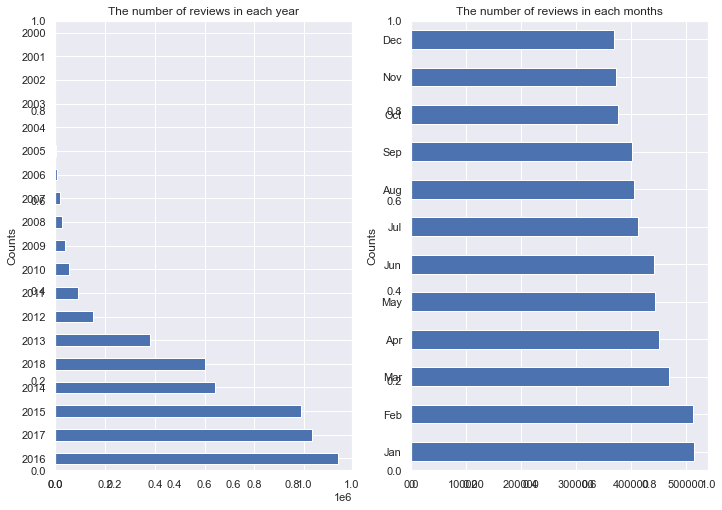

In [8]:
fig, ax = plt.subplots(1,2)

# Divide the figure into a 1x2 grid, and give me the first section
ax1 = fig.add_subplot(1,2,1)

# Divide the figure into a 1x2 grid, and give me the second section
ax2 = fig.add_subplot(1,2,2)

ax[0]=df['year'].value_counts().plot(kind='barh',ax=ax1, title="The number of reviews in each year",ylabel="Years", xlabel="Counts")
ax[1]=df['month'].value_counts().plot(kind='barh',ax=ax2, title="The number of reviews in each months",ylabel="Months", xlabel="Counts")
month_starts = range(0,12)
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 

ax2.set_yticks(month_starts)
ax2.set_yticklabels(month_names)


plt.show()

Most of the reviews (88%) are from verified users meaning that the writer of the review should in principle have bought the product. This verification process is in place to avoid fake reviews. Instead of removing the 'not verified' reviews we will keep them for later investigation of whether the review verification process is of importance for our recommender system.

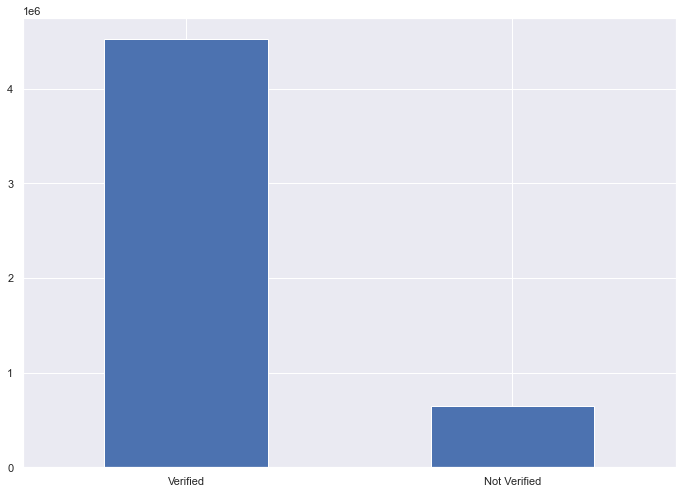

In [9]:
#true means the reviews where the custmomer bought the product
df['verified'].value_counts().plot(kind='bar')
plt.xticks([0,1], ["Verified", "Not Verified"], rotation=0)
plt.show()

Looking at the distribution of reviews and ratings shows a heavy-right skew - most users only review very few products (1-3), most products only receive very few reviews (1-3), the review texts are typically short, and an overweight of reviews contain the most positive rating (5).

<font color ='red'> correct the last two figures below </font>

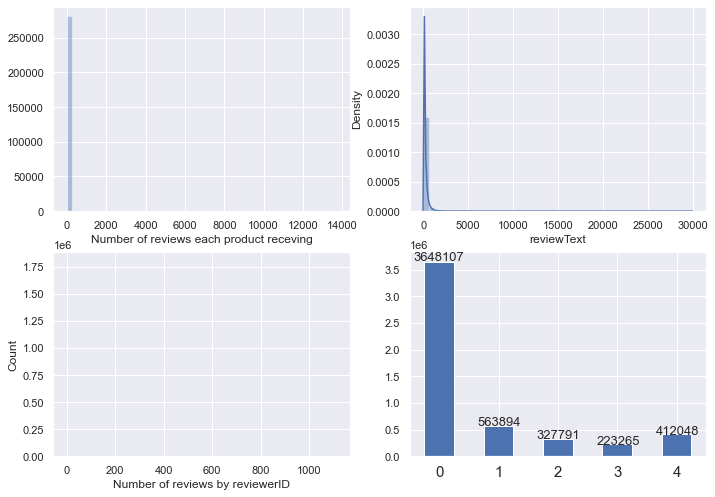

In [10]:
fig, ax = plt.subplots(2,2)
sns.distplot(df.groupby("asin")["overall"].count().rename("Number of reviews each product receving"),
             kde=False, hist=True, ax=ax[0,0])

review_length = df.reviewText.map(str).apply(len)
sns.distplot(review_length, ax=ax[0,1])

sns.histplot(df.groupby("reviewerID")["overall"].count().rename("Number of reviews by reviewerID"),
             ax=ax[1,0])

for patch in ax[1,0].patches :
    current_width = patch.get_width()
    new_value = 0.5
    diff = current_width - new_value
    # we change the bar width
    patch.set_width(new_value)
    # we recenter the bar
    patch.set_x(patch.get_x() + diff * .5)
    patch.set_alpha(1)
    
ax[1,1] = df.overall.value_counts().sort_index(ascending=False).plot(kind="bar") #------------------CHECK 
ax[1,1].get_xticks
# ax[1,1].set_xticks(ax[1,1].get_xticks(), rotation=0, size=15)
ax[1,1].set_xticklabels(ax[1,1].get_xticks(), rotation=0, size=15) # work in different python version

for p in ax[1,1].patches:
    ax[1,1].annotate(str(p.get_height()), (p.get_x() * 1.005 + (p.get_width()/2), p.get_height() * 1.005 +1000), ha="center", size=13)

Next, we try to remove the outliers and the same plots as in previous will be shown.

In [11]:
# Extreme is defined as more than 3 standard deviations from the mean
# Remove asins (products) with extreme number of reviews
asin_count = df.groupby("asin")["overall"].count()
asin_mean, asin_std = asin_count.mean(), asin_count.std()
banned_asin = asin_count[asin_count > asin_mean + asin_std * 3].index

# Remove reviewers that have made an extreme number of reviews
reviewer_count = df.groupby("reviewerID")["overall"].count()
reviewer_mean, reviewer_std = reviewer_count.mean(), reviewer_count.std()
banned_reviewer = reviewer_count[reviewer_count > reviewer_mean + reviewer_std * 3].index

# Remove reviews with an extremely long text
review_mean, review_std = review_length.mean(), review_length.std()
banned_review_index = review_length[review_length > review_mean + review_std * 3].index

df.drop(banned_review_index, inplace=True)
df_withoutOutlier = df[~df.asin.isin(banned_asin) & ~df.reviewerID.isin(banned_reviewer)]

<font color ='red'> correct the last figure below </font>

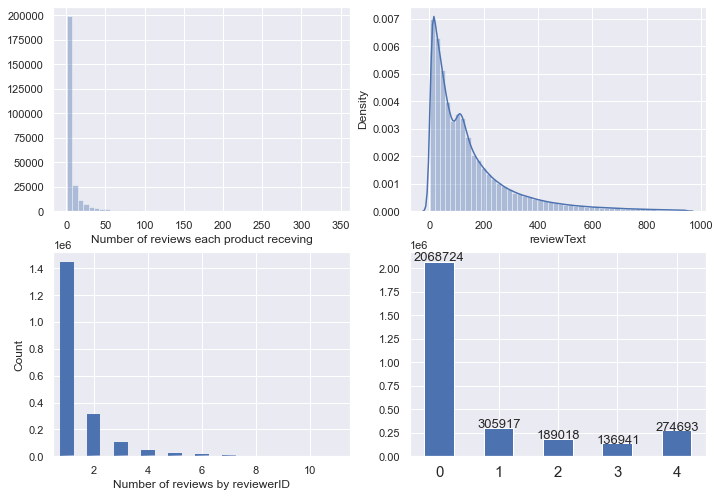

In [12]:
fig, ax = plt.subplots(2,2)
sns.distplot(df_withoutOutlier.groupby("asin")["overall"].count().rename("Number of reviews each product receving"),
             kde=False, hist=True, ax=ax[0,0])

review_length = df_withoutOutlier.reviewText.map(str).apply(len)
sns.distplot(review_length, ax=ax[0,1])

sns.histplot(df_withoutOutlier.groupby("reviewerID")["overall"].count().rename("Number of reviews by reviewerID"),
             ax=ax[1,0])

for patch in ax[1,0].patches :
    current_width = patch.get_width()
    new_value = 0.5
    diff = current_width - new_value
    # we change the bar width
    patch.set_width(new_value)
    # we recenter the bar
    patch.set_x(patch.get_x() + diff * .5)
    patch.set_alpha(1)
    
ax[1,1] = df_withoutOutlier.overall.value_counts().sort_index(ascending=False).plot(kind="bar")
ax[1,1].get_xticks
# ax[1,1].set_xticks(ax[1,1].get_xticks(), rotation=0, size=15)
ax[1,1].set_xticklabels(ax[1,1].get_xticks(), rotation=0, size=15) # work in different python version
for p in ax[1,1].patches:
    ax[1,1].annotate(str(p.get_height()), (p.get_x() * 1.005 + (p.get_width()/2), p.get_height() * 1.005 +1000), ha="center", size=13)

Comparing the above plots with the ones in the previous section it is clearly visible that the outliers have been removed and that the rows have been reduced. Especially the reviewText is less right skewed. We can see that most customers gave only 1 reviews for the products. 

Likewise, most reviews only receive between 1 and 5 'votes' indicating that another user found the review helpful, the review with the most votes got 2088 upvotes!

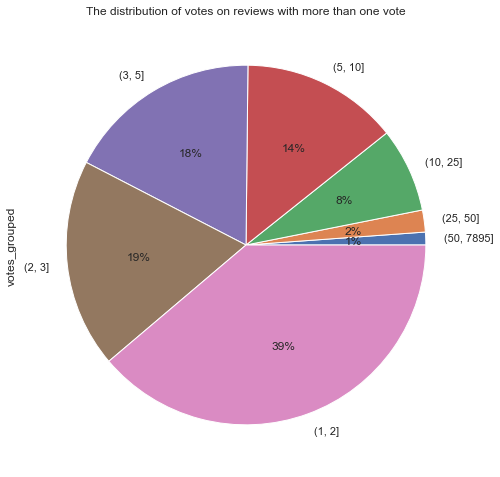

In [13]:
temp=df.copy()
bins = [1,2,3,5,10,25,50,int(temp.vote.max())+1]
temp['votes_grouped'] = pd.cut(temp['vote'],bins=bins)
temp.votes_grouped.value_counts().sort_index(ascending=False).plot(kind="pie",autopct='%.0f%%')
plt.title("The distribution of votes on reviews with more than one vote")
plt.show()

Next we will look at the ratings for different product categories.

In [15]:
mean_score_vs_cat_df = df.groupby(['main_cat']).mean()['overall'].reset_index()
mean_score_vs_cat_df

,main_cat,overall
0,"<img src=""https://images-na.ssl-images-amazon....",3.888889
1,"<img src=""https://images-na.ssl-images-amazon....",4.913793
2,"<img src=""https://images-na.ssl-images-amazon....",4.347826
3,"<img src=""https://images-na.ssl-images-amazon....",4.112195
4,"<img src=""https://images-na.ssl-images-amazon....",4.264050
5,"<img src=""https://m.media-amazon.com/images/G/...",5.000000
6,All Beauty,4.372679
7,All Electronics,4.393443
8,Amazon Home,4.253134
9,Appliances,2.000000


As you can see above there are some misleading indexes under column of `main_cat`, we remove them in the next step.

In [16]:
main_cat_kept=['Grocery', 'Health & Personal Care', 'Amazon Home', 'Toys & Games',
               'All Beauty', 'Industrial & Scientific', 'Sports & Outdoors',
               'Office Products', 'Pet Supplies', 'Arts, Crafts & Sewing',
               'Tools & Home Improvement', 'Baby', 'Cell Phones & Accessories',
               'Computers', 'All Electronics', 'Home Audio & Theater', 'Software', 'Camera & Photo',
               'Automotive', 'Car Electronics', 'Movies & TV', 'Musical Instruments',
               'Portable Audio & Accessories', 'Video Games',
               'Appliances', 'Gift Cards']

df = df[df.main_cat.isin(main_cat_kept)]

In [17]:
df.main_cat.value_counts()

Grocery                         4679397
Health & Personal Care           215057
Amazon Home                      120778
Toys & Games                      16180
All Beauty                        16046
Sports & Outdoors                  9015
Industrial & Scientific            8370
Office Products                    6425
Baby                               1409
Pet Supplies                       1192
Arts, Crafts & Sewing               848
Tools & Home Improvement            559
Cell Phones & Accessories           288
Computers                           152
Home Audio & Theater                 61
All Electronics                      61
Software                             44
Camera & Photo                       38
Car Electronics                      19
Automotive                           18
Musical Instruments                  18
Movies & TV                          14
Portable Audio & Accessories          4
Video Games                           2
Appliances                            1


<font color ='red'> Add a basis explaination of the plot below</font>

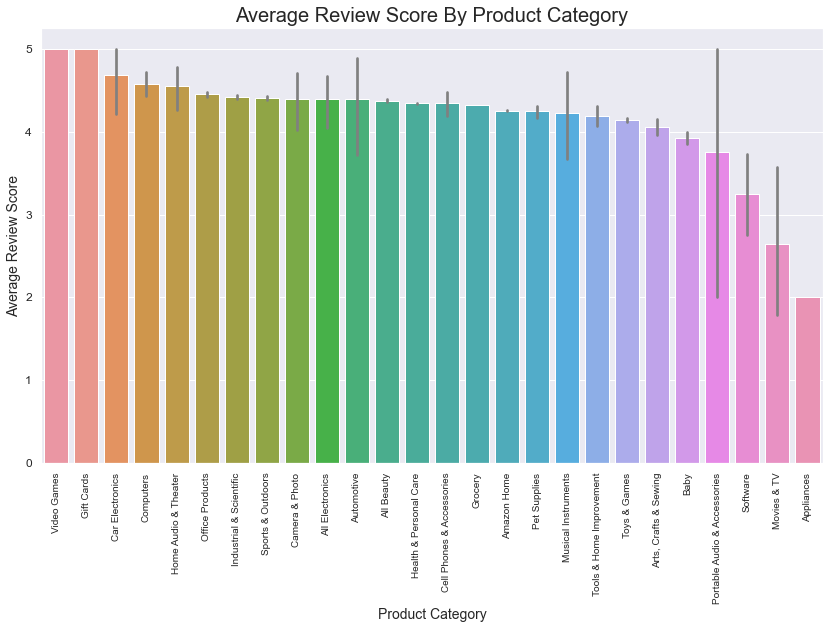

In [18]:
plt.figure(figsize=(14,8))

sns.barplot(data = df, x='main_cat', y='overall',
           order = df.groupby('main_cat').mean()
            .reset_index().sort_values('overall', ascending=False)['main_cat'].values,
           errcolor = 'grey');

plt.title('Average review score by product category'.title(), fontsize=20);
plt.ylabel('Average Review Score'.title(), fontsize=14);
plt.xlabel('Product Category'.title(), fontsize=14);

plt.xticks(rotation=90, fontsize= 10);
plt.yticks(fontsize=12)
plt.show()

---

<a id='dataclean'></a>

### 2.3: Data Cleaning

**Since the original dataset is huge and different ways of recommender system requires different strucure of dataframe, the data cleaning processed is conducted in each section of different recommendation system to meet its demand.**

# Part 3:  Recommender system<a name="recommender"></a>

During the previous few decades, with the increase online shopping activities, recommender systems have played an important role by recommending right products to the interested group to create business value. From e-commerce to online promotion, recommender systems are now seen everywehre in our daily life.

Recommender systems are extremely essential in some industries as they'll generate an enormous quantity of financial gain for the companies and make them stand out. The Recommender System selects and suggests the contents to satisfy user's preference based on users' history and information.

In this part, different ways of generating recommending systems will be carried out and comparisons among different systems will be present.

In [19]:
# data = df.copy() # use cleaned data
data =pd.read_csv('merged_full.csv') # full # use uncleaned data
# data.head(4)

# data = df.copy()
# data = data[data.year==2016]

In [20]:
# Get only columns of `reviewerID`,`overall`, and `asin` for users, ratings, and item
columns = ['reviewerID','overall','asin']
data1 = data[columns]
# Rename columns into `user`,`rating`, and `item`
data1.columns = ['user','rating', 'item']
data1['rating']=data1['rating'].astype(float)
data1

,user,rating,item
0,ALP49FBWT4I7V,5.0,1888861614
1,A1KPIZOCLB9FZ8,4.0,1888861614
2,A2W0FA06IYAYQE,4.0,1888861614
3,A2PTZTCH2QUYBC,5.0,1888861614
4,A2VNHGJ59N4Z90,4.0,1888861614
...,...,...,...
5175100,A1AZD3IIOFDLPC,4.0,B01HJFBN9A
5175101,ASBAV5V4EQQ5H,5.0,B01HJFRDDA
5175102,A33ODS13U2ZLIZ,5.0,B01HJFRDDA
5175103,A3NY9RMNIODSDW,3.0,B01HJEK5QS


In reality, a customer would buy the same product more than one time and give different reviews to each shopping of the same product. This results in different ratings of the same product from the same customer. In our dataframe, we use the average rating that the customer gave to the same product. Below, we get the dataframe with unique pair of `user` and `item`:

In [21]:
avgRate = data1.groupby(["user","item"]).mean()
users,items,ratings = [],[],[]

for i, row in avgRate.iterrows():
    ratings.append(row[0])
    users.append(i[0])
    items.append(i[1])
    
data_avgRate = pd.DataFrame({'user':users, 'item':items, 'rating':ratings})
data_avgRate = data_avgRate[['user', 'item', 'rating']] # correct order
data_avgRate

,user,item,rating
0,A000013090ZI3HIT9N5V,B000SAUVC4,5.0
1,A000013090ZI3HIT9N5V,B00271OPVU,5.0
2,A000013090ZI3HIT9N5V,B0096S6OX4,5.0
3,A000013090ZI3HIT9N5V,B00HHGO4KC,4.0
4,A0000862BTSWL73O3J0Y,B01GH3JVZI,5.0
...,...,...,...
4887512,AZZZPCGBZEF8T,B00M7CONXE,5.0
4887513,AZZZPEF1VNCSV,B00ESDZIRA,5.0
4887514,AZZZU2TD7Q3ET,B005VGVXRC,5.0
4887515,AZZZUAH1VZS7I,B00CPZPYLS,5.0


To reduce the Nan value in the correlation matrix of the rating-user-item dataframe, we create different dataframes for user- and item-based CF. In the user-based CF, we select customers that gave reviews to more than 10-percent of the total number of products, while in the dataframe for item-based CF, we only choose products that received reviews from more than 10-percent of the customers.

In [357]:
def df_item_user_select(df,dfType):
    not_done=True
    if dfType == "item":
        num_std = 55 # full 2G dataset 55
        print("============================================================================")
        print("In this item-based dataframe:")
        print("============================================================================")
        while not_done==True:
            asin_count = df.groupby(dfType)["rating"].count()
            asin_mean, asin_std = asin_count.mean(), asin_count.std()
            banned_asin = asin_count[asin_count > asin_mean + asin_std * num_std].index
            df_new = df[df.item.isin(banned_asin)]
#             print( (df_new.item.value_counts().min()/df_new.user.value_counts().count())*100 )
            if df_new.item.value_counts().min()/df_new.user.value_counts().count()< 0.1: # 0.1
                num_std += 2
            else:
                not_done = False
        temp = (df_new.item.value_counts().min()/df_new.user.value_counts().count())*100
        print(f"Each item receives reviews from { str(round(temp,2))} % of users ")
        print("Total number of users:",df_new.user.value_counts().count())
        print("Total number of items:",df_new.item.value_counts().count())
        print(f"The minimum number of reviews gave to each item: {df_new.item.value_counts().min()}")
        
        return df_new
        
    elif dfType == "user":
        num_std = 124 # full 2G dataset 124
        print("============================================================================")
        print("In this user-based dataframe:")
        print("============================================================================")
        while not_done==True:
            asin_count = df.groupby(dfType)["rating"].count()
            asin_mean, asin_std = asin_count.mean(), asin_count.std()
            banned_asin = asin_count[asin_count > asin_mean + asin_std * num_std].index
            df_new = df[df.user.isin(banned_asin)]
#             print((df_new.user.value_counts().min()/df_new.item.value_counts().count())*100)
            if df_new.user.value_counts().min()/df_new.item.value_counts().count()< 0.1:
                num_std += 2
            else:
                not_done = False
                
        print(f"Each user gives reviews to {str(round((df_new.user.value_counts().min()/df_new.item.value_counts().count())*100,2))} % of items ")
        print("Total number of users:",df_new.user.value_counts().count())
        print("Total number of items:",df_new.item.value_counts().count())
        print(f"The minimum number of reviews each item receives from users: {df_new.user.value_counts().min()}")
        
        return df_new
    
data_item = df_item_user_select(data_avgRate,"item")        
data_user = df_item_user_select(data_avgRate,"user")
display(data_item)
display(data_user)

In this item-based dataframe:
Each item receives reviews from 10.23 % of users 
Total number of users: 54618
Total number of items: 11
The minimum number of reviews gave to each item: 5590
In this user-based dataframe:
Each user gives reviews to 10.77 % of items 
Total number of users: 7
Total number of items: 3694
The minimum number of reviews each item receives from users: 398


,user,item,rating
110,A0132948JMX3OP2NCRYT,B002HQCWYM,5.0
224,A0225361A1VHIBF54USD,B00542YXFW,5.0
297,A0284876LSXSXC74ADV,B01E5XTW24,5.0
331,A030413097ZFMCBCR1Y0,B002HQCWYM,5.0
341,A0311804LSCY25BM9912,B00BUKL666,5.0
...,...,...,...
4887336,AZZT45L993PLR,B008QMX2SG,5.0
4887337,AZZT45L993PLR,B00BUKL666,5.0
4887338,AZZT45L993PLR,B00D3M2QP4,5.0
4887404,AZZVCRIDPN0PQ,B00DS842HS,5.0


,user,item,rating
595643,A1GQAKL9CGQLP1,B0003290ME,2.0
595644,A1GQAKL9CGQLP1,B00032A50A,5.0
595645,A1GQAKL9CGQLP1,B0004LWLIE,4.0
595646,A1GQAKL9CGQLP1,B0004LYTQ6,4.0
595647,A1GQAKL9CGQLP1,B0004M1FGW,5.0
...,...,...,...
4817307,AY12DBB0U420B,B00RW0MZ6S,3.0
4817308,AY12DBB0U420B,B00SCS5B42,5.0
4817309,AY12DBB0U420B,B00TBUHRRO,4.5
4817310,AY12DBB0U420B,B00XOORKRK,3.0


 **Different dataframes for user and item based CF**

In [23]:
# generate user-item dataframe with rating 
def df_user_item(df):
    name_item = df['item'].value_counts().index.tolist()
    name_user = df['user'].value_counts().index.tolist()
    df_new = pd.DataFrame(columns=name_item, index=name_user)
    
    for row in range(len(df)):
        item_name = df["item"].tolist()[row]
        user_name = df["user"].tolist()[row]
        rating_val = df["rating"].iloc[row]
        df_new.loc[str(user_name),str(item_name)] = rating_val
    
    return df_new

df_user = df_user_item(data_user)
df_item = df_user_item(data_item)

display(df_user.transpose())
display(df_item)

,A1LACH6MLQWZ,A1GQAKL9CGQLP1,A2GJX2KCUSR0EI,A2C9XE9I8RSKNX,A2Q7DE6NA7VKAJ,AY12DBB0U420B,A2NYK9KWFMJV4Y
B000E1FZHS,5.0,3.0,5.0,5.0,5.0,3.0,NaN
B000U0OUP6,5.0,3.0,5.0,5.0,5.0,3.0,NaN
B00XOORKRK,5.0,3.0,5.0,NaN,5.0,3.0,NaN
B00RW0MZ6S,5.0,3.0,5.0,NaN,5.0,3.0,NaN
B000LQTTVY,5.0,4.5,NaN,5.0,5.0,NaN,NaN
...,...,...,...,...,...,...,...
B00F9WUPI6,5.0,NaN,NaN,NaN,NaN,NaN,NaN
B00F9WWD54,5.0,NaN,NaN,NaN,NaN,NaN,NaN
B00FCV3R3Y,5.0,NaN,NaN,NaN,NaN,NaN,NaN
B00FD4UL4I,5.0,NaN,NaN,NaN,NaN,NaN,NaN


,B00BUKL666,B008QMX2SG,B00D3M2QP4,B00542YXFW,B01E5XTW24,B000F4DKAI,B0001LO3FG,B00DS842HS,B000EVMNMI,B002HQCWYM,B00CPZPYLS
A1NEIH01B5X6QL,5.0,5.0,5.0,NaN,5.0,NaN,NaN,NaN,5.0,5.0,NaN
A1RN2UC3MB9WPY,5.0,5.0,5.0,NaN,NaN,5.0,5.0,NaN,NaN,NaN,5.0
AVNDHLOBM0LLA,5.0,5.0,5.0,NaN,NaN,5.0,5.0,NaN,NaN,4.75,NaN
A2L6KZGUH51ONU,5.0,5.0,5.0,NaN,NaN,5.0,5.0,NaN,NaN,5.0,NaN
A1R1UYQ5ME462P,5.0,5.0,5.0,NaN,NaN,2.0,2.0,NaN,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
A2GH03E9M81SO5,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A2GH2G4S0VFZYR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
A2GH4DZIG9U2JJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
A2GH7CFRVUDUW7,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3.1  Non-personalized Recommendation

First, find the range of ratings (minimum and maximum values) in the whole dataset.

In [24]:
print("======================================================")
print(f"Minimum and maximum values in the dataframe of df_user")
print("======================================================")
print("Minimum rating:", df_user.min().min())
print("Maximum rating:", df_user.max().max())

print("\n")
print("======================================================")
print(f"Minimum and maximum values in the dataframe of df_item")
print("======================================================")
print("Minimum rating:", df_item.min().min())
print("Maximum rating:", df_item.max().max())

Minimum and maximum values in the dataframe of df_user
Minimum rating: 1.0
Maximum rating: 5.0


Minimum and maximum values in the dataframe of df_item
Minimum rating: 1.0
Maximum rating: 5.0


**Mean-based recommendation** 

Calculate top popular product by their mean ratings:

In [25]:
avg_df_user = df_user.mean().sort_values(ascending=False)
avg_df_item = df_item.mean().sort_values(ascending=False)
print("=========================================================")
print(f"Top 10 most popular products in the dataframe of df_user")
print("=========================================================")
display(avg_df_user[0:10])

print("=========================================================")
print(f"Top 10 most popular products in the dataframe of df_item")
print("=========================================================")
display(avg_df_item[0:10])

Top 10 most popular products in the dataframe of df_user


B00CUQQON4    5.0
B00R79O6NO    5.0
B00SS6EUO0    5.0
B00OTZ7L6I    5.0
B00S9O6V48    5.0
B00S6YI19E    5.0
B00RWVLWWA    5.0
B00RVUYB4I    5.0
B00RVUQZ6K    5.0
B00F9WNSMQ    5.0
dtype: float64

Top 10 most popular products in the dataframe of df_item


B00CPZPYLS    4.703041
B00DS842HS    4.685369
B000F4DKAI    4.580899
B0001LO3FG    4.580641
B01E5XTW24    4.557575
B008QMX2SG    4.518619
B00D3M2QP4    4.518135
B00BUKL666    4.508130
B002HQCWYM    4.450475
B000EVMNMI    4.406708
dtype: float64

Count non-NA cells for each product (rating counts for each product):

In [26]:
counts_df_user = df_user.count()
counts_df_item = df_item.count()

print("=================================================================")
print(f"Non-NA cells counts for each product in the dataframe of df_user")
print("=================================================================")
display(counts_df_user.sort_values(ascending=False))

print("=================================================================")
print(f"Non-NA cells counts for each product in the dataframe of df_item")
print("=================================================================")
display(counts_df_item.sort_values(ascending=False))

Non-NA cells counts for each product in the dataframe of df_user


B000E1FZHS    6
B000U0OUP6    6
B00XOORKRK    5
B00RW0MZ6S    5
B000LQTTVY    4
             ..
B0094MMAN0    1
B0095SP5IU    1
B009P7QQ1G    1
B00BX0YD5E    1
B00TBUHRRO    1
Length: 3694, dtype: int64

Non-NA cells counts for each product in the dataframe of df_item


B00BUKL666    10616
B008QMX2SG     8436
B00D3M2QP4     8413
B00542YXFW     8088
B01E5XTW24     6726
B000F4DKAI     6491
B0001LO3FG     6487
B00DS842HS     6131
B000EVMNMI     6051
B002HQCWYM     5857
B00CPZPYLS     5590
dtype: int64

We define all the ratings >= 4 as positive. So, top most popular products by the percentage of positive marks:

In [27]:
# Top popular product by percentage of positive marks
counts_positive_df_user = df_user[df_user >= 4].count()
counts_positive_df_item = df_item[df_item >= 4].count()

print("=================================================================================")
print(f"Top popular products by percentage of positive marks in the dataframe of df_user")
print("=================================================================================")
display((counts_positive_df_user / counts_df_user).sort_values(ascending=False)[0:10])

print("=================================================================================")
print(f"Top popular products by percentage of positive marks in the dataframe of df_item")
print("=================================================================================")
display((counts_positive_df_item / counts_df_item).sort_values(ascending=False)[0:10])

Top popular products by percentage of positive marks in the dataframe of df_user


B00TBUHRRO    1.0
B004LS2IY8    1.0
B004H4PAU0    1.0
B004HAYMWQ    1.0
B004IF3TAQ    1.0
B004J0NPD6    1.0
B004KNGI6S    1.0
B004KNGNVI    1.0
B004LDWP5A    1.0
B004LL9B0O    1.0
dtype: float64

Top popular products by percentage of positive marks in the dataframe of df_item


B00DS842HS    0.925461
B00CPZPYLS    0.925045
B01E5XTW24    0.891763
B000F4DKAI    0.887074
B0001LO3FG    0.887005
B008QMX2SG    0.870318
B00D3M2QP4    0.870201
B00BUKL666    0.867653
B002HQCWYM    0.851631
B000EVMNMI    0.842836
dtype: float64

**Associative rule recommendation:**

This approach is used to recommend items that are related to chosen one ("People who buy this also bought..."). Let's say one customer bought the product `product A` and we want to have a list of relevant products to buy next. We can apply association rule here. Range products by the percentage of people who also bought `product A`:

In [28]:
product_idx_user = df_user.columns.tolist()
product_idx_item = df_item.columns.tolist()

In [29]:
associative_product_user = product_idx_user[10]
associative_product_item = product_idx_item[10]
watched_product_user = df_user[df_user[associative_product_user].notnull()].count()
watched_product_item = df_item[df_item[associative_product_item].notnull()].count()

print("=============================================================================================================")
print(f"Top 5 most relevant products by the percentage people who also bought {associative_product_user} based on df_user")
print("=============================================================================================================")
display( (watched_product_user / df_user[associative_product_user].count()).sort_values(ascending=False)[0:5])


print("=============================================================================================================")
print(f"Top 5 most relevant products by the percentage people who also bought {associative_product_item} based on df_item")
print("=============================================================================================================")
display( (watched_product_item / df_item[associative_product_item].count()).sort_values(ascending=False)[0:5])

Top 5 most relevant products by the percentage people who also bought B0007R9L4M based on df_user


B0007R9L4M    1.000000
B000E1FZHS    0.666667
B00MWMUWWU    0.666667
B000FVZW7K    0.666667
B00QT62QII    0.666667
dtype: float64

Top 5 most relevant products by the percentage people who also bought B00CPZPYLS based on df_item


B00CPZPYLS    1.000000
B00BUKL666    0.010197
B008QMX2SG    0.009123
B00D3M2QP4    0.009123
B00542YXFW    0.008945
dtype: float64

## 3.2  Personalized Recommendation

There are many ways to build a personalized recommendation system, such as content-based filtering and collaborative filtering recommendation systems. However, most of the customers are one time buyer and only bought one product in Olist. So it's difficult to find the simlarities among customers. In addition, there are many products which were bought once and have no ratings. Hence, the primary challenge is to get our recommender to suggest relevent items based on a small pool of data.

### 3.2.1 Collaborative filtering (CF)

In [30]:
# correlation among users and items
# Compute pairwise correlation of columns, excluding NA/null values
user_corr = df_user.transpose().astype('float64').corr() 
item_corr = df_item.astype('float64').corr()
display(user_corr) # --------------- user
display(item_corr) # --------------- item

,A1LACH6MLQWZ,A1GQAKL9CGQLP1,A2GJX2KCUSR0EI,A2C9XE9I8RSKNX,A2Q7DE6NA7VKAJ,AY12DBB0U420B,A2NYK9KWFMJV4Y
A1LACH6MLQWZ,1.0,NaN,NaN,NaN,NaN,NaN,NaN
A1GQAKL9CGQLP1,NaN,1.000000,-0.347569,-0.497938,-0.473277,0.951973,NaN
A2GJX2KCUSR0EI,NaN,-0.347569,1.000000,-0.280272,0.943880,-0.464827,NaN
A2C9XE9I8RSKNX,NaN,-0.497938,-0.280272,1.000000,NaN,-0.392759,NaN
A2Q7DE6NA7VKAJ,NaN,-0.473277,0.943880,NaN,1.000000,-0.532091,NaN
AY12DBB0U420B,NaN,0.951973,-0.464827,-0.392759,-0.532091,1.000000,NaN
A2NYK9KWFMJV4Y,NaN,NaN,NaN,NaN,NaN,NaN,1.0


,B00BUKL666,B008QMX2SG,B00D3M2QP4,B00542YXFW,B01E5XTW24,B000F4DKAI,B0001LO3FG,B00DS842HS,B000EVMNMI,B002HQCWYM,B00CPZPYLS
B00BUKL666,1.000000,0.995685,0.995682,0.262507,0.105303,0.115622,0.115622,0.105564,-0.057684,-0.069795,0.197342
B008QMX2SG,0.995685,1.000000,1.000000,0.272286,0.185547,-0.083541,-0.083541,0.150668,-0.080038,-0.078187,0.308681
B00D3M2QP4,0.995682,1.000000,1.000000,0.272286,0.185547,-0.086709,-0.086709,0.150668,-0.080038,-0.078187,0.308681
B00542YXFW,0.262507,0.272286,0.272286,1.000000,-0.188982,0.053891,0.053891,0.062184,0.496176,0.311610,0.344640
B01E5XTW24,0.105303,0.185547,0.185547,-0.188982,1.000000,-0.092661,-0.092661,-0.416667,NaN,0.161197,NaN
B000F4DKAI,0.115622,-0.083541,-0.086709,0.053891,-0.092661,1.000000,1.000000,0.251514,0.106245,0.327044,0.464159
B0001LO3FG,0.115622,-0.083541,-0.086709,0.053891,-0.092661,1.000000,1.000000,0.240966,0.106245,0.327044,0.464159
B00DS842HS,0.105564,0.150668,0.150668,0.062184,-0.416667,0.251514,0.240966,1.000000,0.425918,-0.099627,0.204861
B000EVMNMI,-0.057684,-0.080038,-0.080038,0.496176,NaN,0.106245,0.106245,0.425918,1.000000,0.013252,0.654654
B002HQCWYM,-0.069795,-0.078187,-0.078187,0.311610,0.161197,0.327044,0.327044,-0.099627,0.013252,1.000000,0.067082


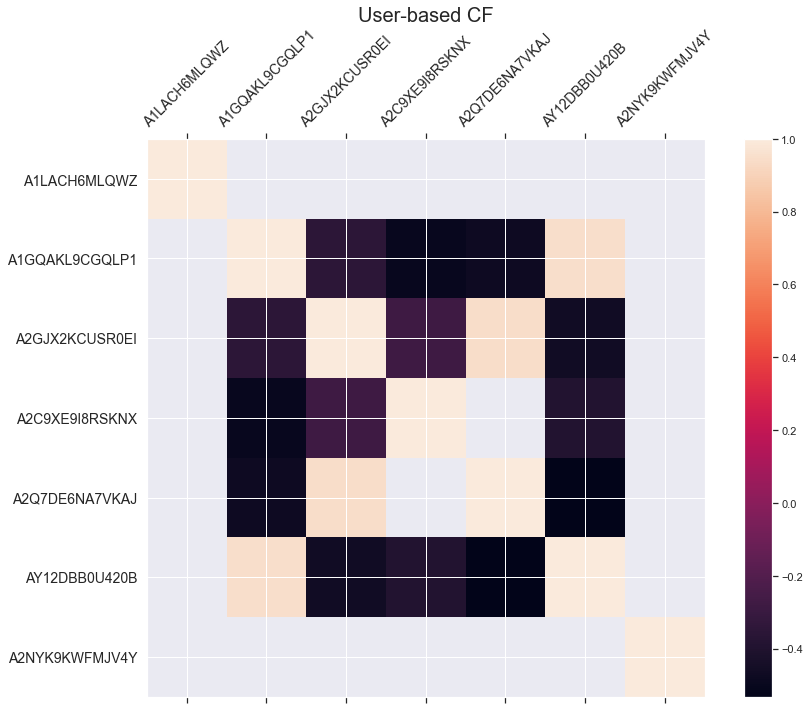

In [32]:
f = plt.figure(figsize=(14, 10))
plt.matshow(user_corr, fignum=f.number)
plt.xticks(range(user_corr.shape[1]), user_corr.columns, fontsize=14, rotation=45)
plt.yticks(range(user_corr.shape[1]), user_corr.columns, fontsize=14)
plt.title("User-based CF", fontsize = 20) 
cb = plt.colorbar()

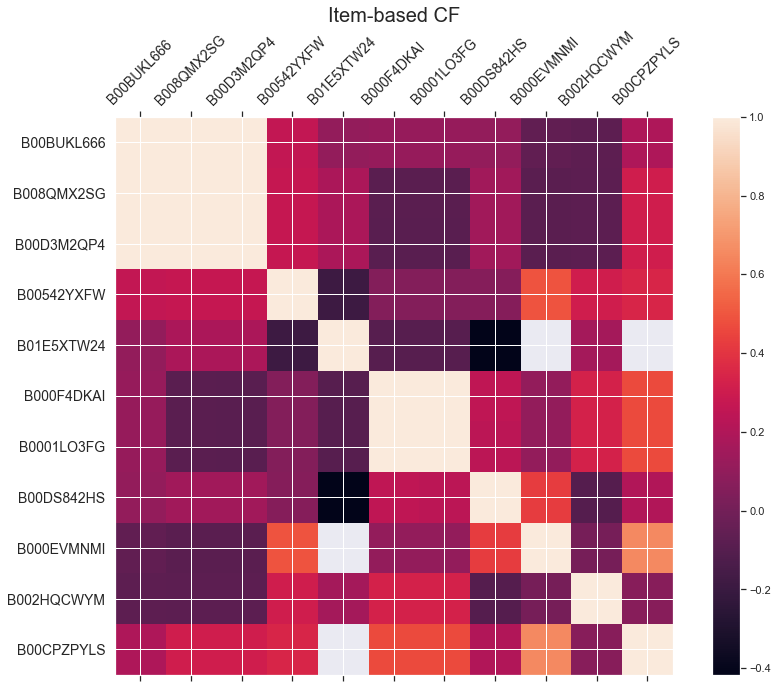

In [33]:
f = plt.figure(figsize=(14, 10))
plt.matshow(item_corr, fignum=f.number)
plt.xticks(range(item_corr.shape[1]), item_corr.columns, fontsize=14, rotation=45)
plt.yticks(range(item_corr.shape[1]), item_corr.columns, fontsize=14)
plt.title("Item-based CF", fontsize = 20) 
cb = plt.colorbar()

#### 3.2.1.1 User-based CF using `df_user`

For this example, we will make predictions for user `user_idx[]`. Our 'neighborhood' for a user - users with $K=5$ highest correlations. Find these users and print their ratings and correlations to user `user_idx[]`.

In [34]:
K = 6
user_idx = df_user.index.tolist()
user_id = user_idx[2] # user id, NOTE: sometimes there might be no correlation of that user, depending on data 
user_id

'A2GJX2KCUSR0EI'

In [35]:
# selecting K neighbors 
neighbours_corr_user_based = user_corr[user_id].sort_values(ascending=False)[1: K+1]
neighbours_corr_user_based

A2Q7DE6NA7VKAJ    0.943880
A2C9XE9I8RSKNX   -0.280272
A1GQAKL9CGQLP1   -0.347569
AY12DBB0U420B    -0.464827
A1LACH6MLQWZ           NaN
A2NYK9KWFMJV4Y         NaN
Name: A2GJX2KCUSR0EI, dtype: float64

In [36]:
neighbours_ratings_user_based = df_user.loc[neighbours_corr_user_based.index]
neighbours_ratings_user_based

,B000E1FZHS,B000U0OUP6,B00XOORKRK,B00RW0MZ6S,B000LQTTVY,B000H26J7E,B0019ZHU2Q,B00BUKL666,B00IDCFXG8,B003KLK9F2,...,B00F1AE9J2,B00F1JV78O,B00F1MULHO,B00F45QRQM,B00F9TDVTY,B00F9WUPI6,B00F9WWD54,B00FCV3R3Y,B00FD4UL4I,B00TBUHRRO
A2Q7DE6NA7VKAJ,5.0,5.0,5.0,5.0,5.0,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A2C9XE9I8RSKNX,5.0,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1GQAKL9CGQLP1,3.0,3.0,3.0,3.0,4.5,5.0,5.0,4.5,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AY12DBB0U420B,3.0,3.0,3.0,3.0,NaN,NaN,5.0,4.666667,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5
A1LACH6MLQWZ,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN
A2NYK9KWFMJV4Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# Find a list of missing ratings for the user
missing_ratings_user_based = df_user.loc[user_id]
missing_ratings_user_based = missing_ratings_user_based[missing_ratings_user_based.isnull()]
missing_ratings_user_based

B000LQTTVY    NaN
B0019ZHU2Q    NaN
B0025UCHYU    NaN
B007FGP4VM    NaN
B001G0MG2I    NaN
             ... 
B00F9WUPI6    NaN
B00F9WWD54    NaN
B00FCV3R3Y    NaN
B00FD4UL4I    NaN
B00TBUHRRO    NaN
Name: A2GJX2KCUSR0EI, Length: 3155, dtype: object

In [38]:
user_mean_user_based = df_user.loc[user_id].mean()
print(user_mean_user_based)

neighbours_means_user_based = neighbours_ratings_user_based.mean(axis=1)
print(neighbours_means_user_based)

4.3228200371057515
A2Q7DE6NA7VKAJ    3.895111
A2C9XE9I8RSKNX    4.265672
A1GQAKL9CGQLP1    4.502373
AY12DBB0U420B     4.668235
A1LACH6MLQWZ      4.915533
A2NYK9KWFMJV4Y    4.901173
dtype: float64


In [39]:
# make rating predictions
for movie_name, val in missing_ratings_user_based.iteritems():
    rating = 0
    weights_sum = 0
    
    for neighbour_id, row in neighbours_ratings_user_based.iterrows():
        if np.isnan(row[movie_name]): continue
        rating += neighbours_corr_user_based.loc[neighbour_id] * (row[movie_name] - neighbours_means_user_based.loc[neighbour_id])
        weights_sum += abs(neighbours_corr_user_based.loc[neighbour_id])
   
    if weights_sum > 0:
        rating /= weights_sum  
    rating += user_mean_user_based
    
    missing_ratings_user_based.at[movie_name] = rating
    
print("======================================================")
print(f"User-based prediction for user: {user_id}")
print("======================================================")
missing_ratings_user_based.sort_values(ascending=False)[0:5]

User-based prediction for user: A2GJX2KCUSR0EI


B000EMQFY4    7.825193
B00C4DTS5Y    7.825193
B003WP43RQ    7.825193
B000RPXWCQ    7.825193
B001EPQVEO    7.825193
Name: A2GJX2KCUSR0EI, dtype: object

We notice that for some users, the prediction score for the product might larger than maximum rating value. This is possible according to the definition of score - user's tendecy to give higher/lower ratings, which is defined as:

$$ r_{xi} = \mu_{x} + \frac{\Sigma_{y \in \mathbf{K}}sim(x,y)(r_{yi}-\mu_{y})}{\Sigma_{y \in \mathbf{K}}|sim(x,y)|}  $$

Where $\mu_x$ is a mean rating for a user and $sim$ can be defined in different ways, for example, as cosine similarity or correlation.

#### 3.2.1.2 Item-based CF using `df_item`

In [40]:
user_idx = df_item.index.tolist()
user_id = user_idx[2] # user id, NOTE: sometimes there might be no correlation of that user, depending on dat

# user_id = 'A1WX42M589VAMQ' # if we try to predict the same user but using the item-based CF approach and different dataframe

# Find a list of missing ratings for the user
missing_ratings_item_based = df_item.loc[user_id]
missing_ratings_item_based = missing_ratings_item_based[missing_ratings_item_based.isnull()]
missing_ratings_item_based

B00542YXFW    NaN
B01E5XTW24    NaN
B00DS842HS    NaN
B000EVMNMI    NaN
B00CPZPYLS    NaN
Name: AVNDHLOBM0LLA, dtype: object

In [41]:
# predict the ratings of movies that are missing in the user with `user_id`
for movie_name, val in missing_ratings_item_based.iteritems():
    # initialize
    rating = 0
    weights_sum = 0
    # define similairity as the correlation between the `movie_name` without ratings and other movives
    neighbours_corr = item_corr[movie_name].sort_values(ascending=False)[1: K+1]
    # get the mean rating for the item `movie_name`
    item_mean = df_item[movie_name].mean()
    
    neighbours_ratings = df_item[neighbours_corr.index].transpose()
    # get mean for each neighbour (total is K)
    neighbours_means = neighbours_ratings.mean(axis=1)
    
    for neighbour_id, row in neighbours_ratings.iterrows():
        if np.isnan(row[user_id]): continue
        rating += neighbours_corr[neighbour_id] * (row[user_id] - neighbours_means[neighbour_id])
        weights_sum += abs(neighbours_corr[neighbour_id])
    if weights_sum > 0:
        rating /= weights_sum
    rating += item_mean
    missing_ratings_item_based.at[movie_name] = rating
    
print("======================================================")
print(f"Item-based prediction for user: {user_id}")
print("======================================================")
missing_ratings_item_based.sort_values(ascending=False)[0:5]

Item-based prediction for user: AVNDHLOBM0LLA


B00CPZPYLS    5.147192
B00DS842HS    5.128283
B000EVMNMI    4.818911
B01E5XTW24    4.801965
B00542YXFW    4.634196
Name: AVNDHLOBM0LLA, dtype: object

### 3.2.2 Content-based filtering (linear model)

#### 3.2.2.1 Text mining of `reviewText` 
The idea is to recommend customers products by analyzing their review texts to see what they prefer and what they don't. This requires the technique of text mining. Due to the computational cost, here we select 10\% of one-year reviews, year of 2018 - instead of full dataset, to demenstate how the text mining technique used to analyze customer's personal preference via their review text gave to products.

In [42]:
""" Use dataframe from Part 2 Data Analysis and Visualization:
`df` which exclude the extreme long review text &
already include the column of `year` """
df_content = df.copy()
df_content = df_content[df_content.year==2018]
tenPercent = int(df_content.shape[0]*0.1)
df_content = df_content.iloc[0: tenPercent]

Then, we select only neccessary columns to prepare for the text mining.

In [43]:
# select only neccessary columns
df_content= df_content[["overall","reviewerID","asin","reviewText"]]
# rename columns
df_content.columns = ["rating","reviewerID","productID","reviewText"]
# drop row if there is nan value in the column `reviewText`
df_content = df_content.dropna()

Then, we clear up the review text via the following steps:
- remove punctuation
- apply lowercase
- remove stopwords
- apply lemmatization

In [44]:
lemmatizer = WordNetLemmatizer()
stop_Words= _stop_words.ENGLISH_STOP_WORDS
stop_Words = list(stop_Words) 

def text_processing(text):
    # remove punctuation 
    text = "".join([c for c in text 
                    if c not in string.punctuation])
    # lowercase
    text = "".join([c.lower() for c in text])
    # remove stopwords
    text = " ".join([w for w in text.split() 
                     if w not in stop_Words])
    # stemming / lematizing (optional)
    text = " ".join([lemmatizer.lemmatize(w) for w in text.split()])
    return text

In [45]:
# clean the text before vectorizing
Review_clean = df_content['reviewText'].apply(text_processing)
# Review_clean

Next, vectorizing the text after cleaning before creating the Latent Dirichlet Allocation (LDA) model

In [46]:
# vectorizing of text
vectorizer = CountVectorizer() 
descriptions_bow=vectorizer.fit_transform(Review_clean) 

Now, we can use LDA model, with 20 topics to prepare for content-based dataframe

In [47]:
n_topics = 20 # ------------------------- number of topics for each review
lda = LatentDirichletAllocation(n_components=n_topics, learning_method='batch')
topic = lda.fit_transform(descriptions_bow)

In [48]:
# combine the topics with original `df`
for i in range(n_topics):
    df_content["LDA_topic"+str(i)]=topic[:,i]
df_content.head(3)

,rating,reviewerID,productID,reviewText,LDA_topic0,LDA_topic1,LDA_topic2,LDA_topic3,LDA_topic4,LDA_topic5,...,LDA_topic10,LDA_topic11,LDA_topic12,LDA_topic13,LDA_topic14,LDA_topic15,LDA_topic16,LDA_topic17,LDA_topic18,LDA_topic19
169,4,A20LEK2JTETFA4,4639725043,Works well in coffee maker,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,...,0.012500,0.012500,0.262497,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.512503
170,5,A1G3KT0T83DBHK,4639725043,About 15 years ago I was visiting a friend in ...,0.001282,0.001282,0.001282,0.001282,0.001282,0.070515,...,0.388520,0.001282,0.001282,0.113090,0.001282,0.001282,0.246607,0.069600,0.001282,0.001282
171,5,A2M5O0Z0B69JOK,4639725043,This tea is *very* strong compared to other l...,0.003125,0.003125,0.003125,0.133329,0.003125,0.003125,...,0.098442,0.003125,0.003125,0.003125,0.003125,0.003125,0.715104,0.003125,0.003125,0.003125


We would like to see top words for each topic, so here we print the 10 top words for those 20 topics

In [49]:
def print_top_words(model, feature_names, n_top_words):
    norm = model.components_.sum(axis=1)[:, np.newaxis]
    for topic_idx, topic in enumerate(model.components_):
        print(80 * "-")
        print("Topic {}".format(topic_idx))
        for i in topic.argsort()[:-n_top_words - 1:-1]:
            print("{:.3f}".format(topic[i] / norm[topic_idx][0]) 
                  + '\t' + feature_names[i])

In [50]:
print("10 Top words for those topics in LDA model:")
counts_feature_names = vectorizer.get_feature_names() # count_vect = CountVectorizer()
n_top_words = 10
print_top_words(lda, counts_feature_names, n_top_words)

10 Top words for those topics in LDA model:
--------------------------------------------------------------------------------
Topic 0
0.026	bread
0.017	make
0.015	use
0.012	bean
0.012	bear
0.009	gummy
0.009	just
0.009	machine
0.008	time
0.008	yeast
--------------------------------------------------------------------------------
Topic 1
0.248	love
0.051	flavor
0.019	gum
0.019	kid
0.017	taste
0.016	fruit
0.015	cake
0.014	oil
0.008	stuff
0.008	jelly
--------------------------------------------------------------------------------
Topic 2
0.323	good
0.051	taste
0.033	yummy
0.029	really
0.027	price
0.022	product
0.022	flavor
0.018	stuff
0.017	like
0.017	better
--------------------------------------------------------------------------------
Topic 3
0.053	amazing
0.036	size
0.033	exactly
0.031	wonderful
0.031	bag
0.026	small
0.020	described
0.018	large
0.014	fresh
0.014	delicious
--------------------------------------------------------------------------------
Topic 4
0.025	nice
0.022	recommend


#### 3.2.2.2 Recommender system based on customer's preference profile 

**Step 1**: select target customers for recommedation

In [51]:
# total no. of reviwer
reviewers_count = df_content['reviewerID'].value_counts()
n_reviewers = reviewers_count.count()

# get reviewers giving more than 20 reviewers
n_giving = int(np.quantile(reviewers_count, 0.9))
target_users = reviewers_count[reviewers_count > n_giving].index
n_target_user = len(target_users)

# target customer id
user_id = target_users[0]
user_id

print("===================================================================")
print(f"There are total {n_reviewers} reviewers in the dataset")
print(f"There are ONLY {n_target_user} giving more than {n_giving} reviews")
print(f"Target customer id:",user_id)
print("===================================================================")

There are total 43650 reviewers in the dataset
There are ONLY 2362 giving more than 2 reviews
Target customer id: A2C7LMOT0SEBRK


**Step 2**: build target customer's profiles for recommedation

In [52]:
def customer_profiles(df,user_id):
    X = df[df.reviewerID==user_id].iloc[:,4:24].values
    y = df[df.reviewerID==user_id].iloc[:,0].values
    
    lr_hyperparams = {'penalty':'l2', 'C':1000, 'solver':'lbfgs'}
    lr = LogisticRegression(**lr_hyperparams) 
    profiles = lr.fit(X, y)
    
    print('===============================================')
    print(f"User: {user_id} giving {len(y)} reviews")
    print(f"LogisticRegression Score:",profiles.score(X, y))
    print('===============================================')
    print("Overall bias:", profiles.intercept_[0])
    
    f = plt.figure(figsize=(10, 8))
    plt.barh(df.iloc[:,4:24].columns.values, profiles.coef_[0] )
    plt.xlabel("Coefficient for each topic")
    plt.title(f"{user_id}  profiles preferences - based on topics in review text")
    plt.show()
    return profiles

User: A2C7LMOT0SEBRK giving 23 reviews
LogisticRegression Score: 1.0
Overall bias: -1.1383858633378765


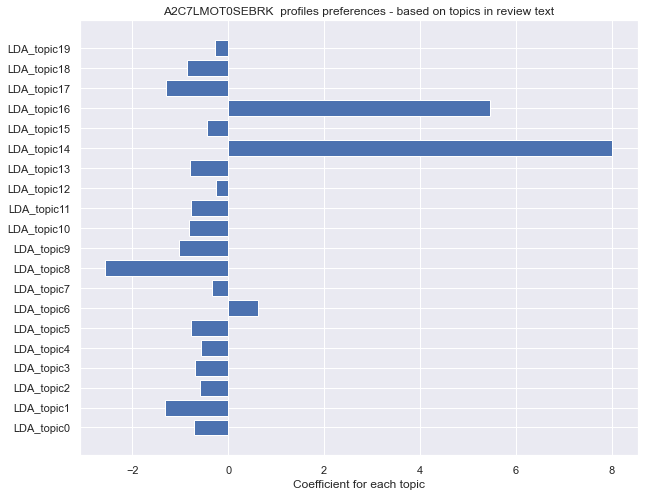

In [53]:
profiles = customer_profiles(df_content,user_id)

**Step 3**: predict rating based on target customer's profile

In [54]:
# predict all rows' rating 
X_all = df_content.iloc[:,4:24].values
df_user_id = df_content.copy()

def pred_ratings(df,profiles,X,user_id):
    print('=====================================================')
    print(f"Predicted rating based on {user_id}'s profiles")
    print('=====================================================')
    y_pred = profiles.predict(X)
    df["pred_rating"] = y_pred
    return df

In [55]:
pred_df = pred_ratings(df_user_id,profiles,X_all,user_id)

# predicted rating based on user_id's preferences
productID_index= pred_df[pred_df.reviewerID == user_id].productID.value_counts().index
recom_df = pred_df[ (pred_df.reviewerID != user_id) & (~pred_df.productID.isin(productID_index))]
recom_df.head(3)

Predicted rating based on A2C7LMOT0SEBRK's profiles


,rating,reviewerID,productID,reviewText,LDA_topic0,LDA_topic1,LDA_topic2,LDA_topic3,LDA_topic4,LDA_topic5,...,LDA_topic11,LDA_topic12,LDA_topic13,LDA_topic14,LDA_topic15,LDA_topic16,LDA_topic17,LDA_topic18,LDA_topic19,pred_rating
169,4,A20LEK2JTETFA4,4639725043,Works well in coffee maker,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,...,0.012500,0.262497,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.512503,5
170,5,A1G3KT0T83DBHK,4639725043,About 15 years ago I was visiting a friend in ...,0.001282,0.001282,0.001282,0.001282,0.001282,0.070515,...,0.001282,0.001282,0.113090,0.001282,0.001282,0.246607,0.069600,0.001282,0.001282,5
171,5,A2M5O0Z0B69JOK,4639725043,This tea is *very* strong compared to other l...,0.003125,0.003125,0.003125,0.133329,0.003125,0.003125,...,0.003125,0.003125,0.003125,0.003125,0.003125,0.715104,0.003125,0.003125,0.003125,1


**Step 4**: recommend products to target customer by predicting rating based on her/his profile

In [56]:
# mean rating of each non-bought product for user_id, based on predicted rating using user_id's preference
print('============================================================================================')
print(f"Products recommended to {user_id} based on her/his reviews's profile with predicted rating")
print('============================================================================================')
recom_df.groupby('productID').pred_rating.mean().sort_values(ascending=False)[0:10]

Products recommended to A2C7LMOT0SEBRK based on her/his reviews's profile with predicted rating


productID
B000F4ET0I    5.0
B000H1327A    5.0
B000GZWDR2    5.0
B000GZY8VG    5.0
B000GZY942    5.0
B000GZY94W    5.0
B000GZY9DS    5.0
B000GZYBIG    5.0
B000H1195C    5.0
B000RHUV6Y    5.0
Name: pred_rating, dtype: float64

### 3.2.3 Matrix factorization

In matrix factorization techniques, we usually represent the rating matrix as a product of 3 other matrices:

$$R = P\Sigma Q^{T}$$

The benefits of those techniques are that they can dramatically improve system performance by reducing the necessary amount of space. 

`surprise` is an easy-to-use Python package for recommender systems. Here we will use the famous Singular Value Decomposition [(SVD) algorithm](http://sifter.org/simon/journal/20061211.html). The document for this model in the Surprise page is [here](http://surprise.readthedocs.io/en/stable/matrix_factorization.html)

First, let's create a dataframe in the format of 
```
userID, movieID, rating
```
to preceed.

In [57]:
""" Here we used the same dataframe `df_item` as those in CF """

data = df_item.copy()
user_ids, movie_ids, ratings = [], [], []

for user_id, row in data.iterrows():
    for movie_id in data.columns:
        rating = row[movie_id]
        if not np.isnan(rating):
            user_ids.append(user_id)
            movie_ids.append(movie_id)
            ratings.append(rating)
ratings_df = pd.DataFrame({'userID':user_ids, 'movieID':movie_ids, 'rating':ratings})
ratings_df = ratings_df[['userID', 'movieID', 'rating']] # correct order

print("============================")
print("The ratings describtion")
print("============================")
ratings_df.describe()

The ratings describtion


,rating
count,78886.000000
mean,4.510511
std,1.062682
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


Next, we create a dataset in the required format for the package of `surprise`. The rating scale should be specified in `Reader`, such as in our case, it is `(0.0,5.0)`

In [58]:
reader = Reader(rating_scale=(0.0, 5.0))
data_surprise = Dataset.load_from_df(ratings_df, reader)
data_train_surprise = data_surprise.build_full_trainset() # use the whole training set 

Now we run the SVD algorithm.

In [59]:
n_factors = 15
lr_all = 0.005 # default value
reg_all = 0.02 # default value

model_SVD = SVD(n_factors=n_factors, lr_all=lr_all, reg_all=reg_all)
model_SVD.fit(data_train_surprise)

Next, for this example, we make the top 5 predictions for a User, such as `user_id = data.index[0]`

In [60]:
user_id = data.index[0]
# user_id = 'A2C7LMOT0SEBRK'

missing_movies_ids = data[data.isna()].loc[user_id].index

recommendations = []
for movie_id in missing_movies_ids:
    r = model_SVD.predict(user_id, movie_id, verbose=False).est
    recommendations.append((movie_id, r))
    
recommendations.sort(reverse=True, key=lambda x: x[1])

print("=========================================================================================")
print(f"The top 5 predictions for user id of {user_id} using the matrix factorization technique")
print("=========================================================================================")
recommendations[:5]

The top 5 predictions for user id of A1NEIH01B5X6QL using the matrix factorization technique


[('B00CPZPYLS', 5.0),
 ('B008QMX2SG', 4.995163922659586),
 ('B00D3M2QP4', 4.985990996657806),
 ('B00BUKL666', 4.911395610476932),
 ('B00DS842HS', 4.874642387540755)]

For the computational convenience, we used different recommendation algorithms for different users to demenstrate the ideas of recommendation system. You might notice that the recommendations to the same user could be quite different when using different algorithms. To estimate performance of the each approache, it is suggested to do train/test split (or cross-validation). But, we will skip this comparison here. 

## 3.3 SVD-based recommender system

Finally, let's try to build a recommender system based on SVD and evaluate its performance against the common baselines. We will use the same data as before.

In [321]:
""" Here we used the same dataframe `df_item` as those in CF """
def df_ratings (df,Type):  # e.g. df_ratings(df_item,"user") df_ratings(df_user,"item")
    data = df.copy()
    users, items, ratings = [], [], []
    for user, row in data.iterrows():
        for item in data.columns:
            rating = row[item]
            if not np.isnan(rating):
                users.append(user)
                items.append(item)
                ratings.append(rating)
    ratings_df = pd.DataFrame({'user':users, 'item':items, 'rating':ratings})
    ratings_df = ratings_df[['user', 'item', 'rating']] # correct order
    
    count = ratings_df[Type].value_counts()
    target= count[count > 2].index
    ratings_df = ratings_df[ ratings_df[Type].isin(target) ].reset_index(drop=True) 
    return ratings_df

We decided to use `df_item` dataframe for SVD algoritm as it has 26309 rows, as shown below.

In [322]:
ratings_df = df_ratings(df_item,"user")
# ratings_df = df_ratings(df_user,"item")

In [323]:
ratings_df

,user,item,rating
0,A1NEIH01B5X6QL,B00BUKL666,5.0
1,A1NEIH01B5X6QL,B008QMX2SG,5.0
2,A1NEIH01B5X6QL,B00D3M2QP4,5.0
3,A1NEIH01B5X6QL,B01E5XTW24,5.0
4,A1NEIH01B5X6QL,B000EVMNMI,5.0
...,...,...,...
26304,A3QHEPJER3W35V,B008QMX2SG,5.0
26305,A3QHEPJER3W35V,B00D3M2QP4,5.0
26306,A3RNNT3FENRN72,B00BUKL666,5.0
26307,A3RNNT3FENRN72,B008QMX2SG,5.0


### 3.3.1 Data and Train/test split

We use 70%/% 30 train/test split. 

In [324]:
def train_indx(ratings_df,Type): # train_ind(ratings_df,"item") in case of using the df_user
    train_ind, test_ind = [], []
    for idx in ratings_df[Type].unique():
        rows = ratings_df[ratings_df[Type] == idx]
        ind = rows.index[:1].values.tolist()
        train_ind += ind
    return train_ind, test_ind

# train_ind, test_ind = train_indx(ratings_df,"item") # user-based dataset
train_ind, test_ind = train_indx(ratings_df,"user") # item-based dataset

c = 0.7 # only valid when the c is larger than b 
b = len(train_ind) / len(ratings_df)
a = (c - b) / (1 - b)

all_ind = set(range(len(ratings_df)))
not_used = list(all_ind - set(train_ind))
not_done = True
np.random.seed(42)
while not_done==True:
    np.random.shuffle(not_used)
    train_ind_ = train_ind + not_used[:int(a * len(not_used))]
    df_train = ratings_df.loc[train_ind_]
    print("No. of items in total and training dataset:",ratings_df.nunique()['item'], df_train.nunique()['item'])
    print("No. of users in total and training dataset: ",ratings_df.nunique()['user'], df_train.nunique()['user'])
    if ratings_df.nunique()['item'] == df_train.nunique()['item'] and ratings_df.nunique()['user'] == df_train.nunique()['user']:
        not_done = False
        train_ind = train_ind_
test_ind = list(all_ind - set(train_ind))
train_ind = sorted(train_ind)
test_ind = sorted(test_ind)
print("Training dataset:", str(round(len(train_ind)/len(all_ind),3)))
print("Testing dataset:", str(round(len(test_ind)/len(all_ind),3)))
np.savetxt('data/data_train.csv', train_ind, fmt="%d")
np.savetxt('data/data_test.csv', test_ind, fmt="%d")

No. of items in total and training dataset: 11 11
No. of users in total and training dataset:  8640 8640
Training dataset: 0.7
Testing dataset: 0.3


In [325]:
# loading the pre-computed indices
train_ind = np.loadtxt('data/data_train.csv', dtype=int)
test_ind = np.loadtxt('data/data_test.csv', dtype=int)

In [326]:
print("number of training samples:", train_ind.shape[0])
print("number of test samples:", test_ind.shape[0])

number of training samples: 18416
number of test samples: 7893


In [327]:
df_train = ratings_df.iloc[train_ind]
df_test = ratings_df.iloc[test_ind]

### 3.3.2 Baselines <font color=red> How to interprate the results </font>

We use 4 baseline models:
1. Global mean
2. User's mean
3. Item's mean
4. Global + deviation of user + deviation of the item

We estimate each of above baseline model on the training set and calculate RMSE on the test set. Also, we made boxplots for the visualization of the predictions. 

In [328]:
def RMSE(y_true, y_pred):
    return np.linalg.norm(y_true - y_pred) / np.sqrt(len(y_true))

In [329]:
# A plotter to make boxplot
def MakeBoxplot(y_true, y_pred, title):
    data = [y_pred[y_true == (x*0.5+0.5)] for x in range(10)]
    fig = plt.figure(figsize=(5, 5))
    plt.boxplot(data)
    min_a, max_a = 0., 5.5
    plt.xlim((min_a, max_a))
    plt.ylim((min_a, max_a))
    plt.plot([min_a, max_a * 2], [min_a, max_a], ls='--', color='gray', linewidth=1.0)
    plt.xticks(range(12), [x*0.5 for x in range(12)])
    plt.xlabel('True Rating')
    plt.ylabel('Predicted Rating')
    plt.title(title)
    plt.show()

In [330]:
y_true = df_test['rating'].values

**1. Baseline: Global mean**

global_mean = 4.521023126887593
RMSE = 1.0407326620996171


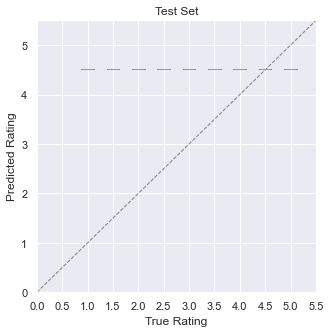

In [331]:
# global mean
global_mean = df_train['rating'].mean()
print("global_mean =", global_mean)
# prediction
y_pred = []
for i, row in df_test.iterrows(): 
    y_pred.append(global_mean)
y_pred = np.array(y_pred)
y_pred = np.clip(y_pred, 0.5, 5.0)

# performance
error = RMSE(y_true, y_pred)
print("RMSE =", error)
MakeBoxplot(y_true, y_pred, 'Test Set')

**2. Baseline: User's mean**

RMSE = 0.22784911525306994


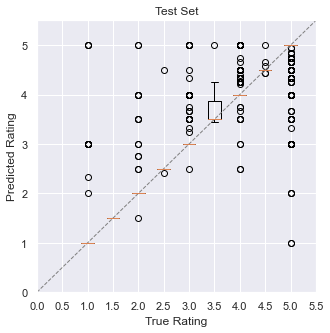

In [332]:
# user mean
user_mean = df_train.groupby('user')['rating'].mean()
# prediction
y_pred = []
for i, row in df_test.iterrows():
    y_pred.append(user_mean[row['user']])
y_pred = np.array(y_pred)
y_pred = np.clip(y_pred, 0.5, 5.0)
# performance
error = RMSE(y_true, y_pred)
print("RMSE =", error)
MakeBoxplot(y_true, y_pred, 'Test Set')

**3. Baseline: Item's mean**

RMSE = 1.0403453654785006


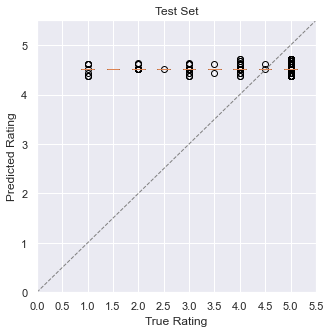

In [333]:
# item mean
item_mean = df_train.groupby('item')['rating'].mean()
# prediction
y_pred = []
for i, row in df_test.iterrows():
    y_pred.append(item_mean[row['item']])
y_pred = np.array(y_pred)
y_pred = np.clip(y_pred, 0.5, 5.0)
# performance
error = RMSE(y_true, y_pred)
print("RMSE =", error)
MakeBoxplot(y_true, y_pred, 'Test Set')

**4. Baseline: Global + deviation of user + deviation of the item**

RMSE = 0.22613024324999695


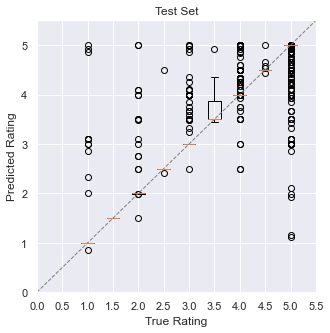

In [334]:
# Combined model
# prediction
y_pred = []
for i, row in df_test.iterrows():
    r = user_mean[row['user']] + item_mean[row['item']] - global_mean
    y_pred.append(r)
y_pred = np.array(y_pred)
y_pred = np.clip(y_pred, 0.5, 5.0)
# performance
error = RMSE(y_true, y_pred)
print("RMSE =", error)
MakeBoxplot(y_true, y_pred, 'Test Set')

### 3.3.3 Trying to beat the baselines with SVD 

Here, we try to beat the baselines with SVD. Note, that SVD has many hyperparameters, where the number of factors (`n_factors`) and regularization strength (`reg_all`) are the most important. But, we also try to tune the factors of `n_epochs`, and `lr_all`, as shown below.

In [342]:
reader = Reader(rating_scale=(0.0, 5.0))
data_surprise = Dataset.load_from_df(df_train, reader)

In [351]:
param_grid = {
    'n_epochs': [60], 
    'lr_all': [0.005, 0.05],
    'reg_all': [0.01, 0.1], # key 
    'n_factors': [10, 25, 50], # key
#     'biased': [True, False]
}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data_surprise)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.577678201623055
{'n_epochs': 60, 'lr_all': 0.05, 'reg_all': 0.01, 'n_factors': 50}


In [352]:
# We can now use the algorithm that yields the best rmse:
model = gs.best_estimator['rmse']
model.fit(data_surprise.build_full_trainset())

In [353]:
user_ids_true = df_test['user'].values
movie_ids_true = df_test['item'].values

RMSE = 0.17471916324279607


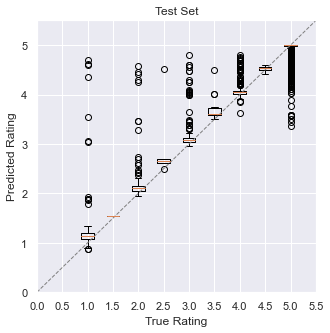

In [354]:
y_pred = []
for user_id, movie_id in zip(user_ids_true, movie_ids_true):
    r = model.predict(user_id, movie_id, verbose=False).est
    y_pred.append(r)
y_pred = np.array(y_pred)
# performance
error = RMSE(y_true, y_pred)
print("RMSE =", error)
MakeBoxplot(y_true, y_pred, 'Test Set')